# Demonstration of added utility depending on time to IVT and MT

In this notebook we examine the relationship between time to treatment and the effect of treatment.

Outcome results are calculated for three patients groups:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

When we look at combined effect of these groups, we make some basic assumptions (which are used as being 'reasonable' rather than 'definitive'):

* 20% of all ischaemic stroke admissions receive IVT and/or MT.
* 35% of our treated population have LVO.
* 28.6% of LVO receive MT (this gives 10% of all ischaemic strokes receiving MT)
* 85% of LVO receiving MT have received IVT (from clinical trials  data); for those 85% if the benefit of IVT exceed the benefit of MT (e.g. very early IVT, and very late MT), then the benefit is based on IVT.
* 15.5% nLVO receive thrombolysis (this brings total IVT to 20% use).


## Load packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # for axis tick locations

import numpy as np
import pandas as pd
import copy
import os

from stroke_outcome.continuous_outcome import Continuous_outcome

import warnings
warnings.filterwarnings("ignore")

In [2]:
from geography_calc import create_outcome_model_inputs, run_outcome_model, combine_outcomes_treated_ischaemic, combine_outcomes_lvo

In [3]:
dir_output = 'output'
dir_images = 'images'

## Set up model

In [4]:
# Set up outcome model
outcome_model = Continuous_outcome()

## Individual treatment effects

Here we consider the impact, and effect of time to treatment, for three cohorts independently:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

Set up shared treatment times:

In [5]:
max_time_to_ivt = 6.3 * 60  # minutes
max_time_to_mt = 8.0 * 60  # minutes

In [7]:
treatment_times_ivt = np.arange(0.0, max_time_to_ivt + 10, 10)
treatment_times_mt = np.arange(0.0, max_time_to_mt + 10, 10)

Create a dataframe for each cohort:

In [8]:
df_patients_nlvo_ivt = pd.DataFrame()
df_patients_nlvo_ivt['onset_to_needle_mins'] = treatment_times_ivt
df_patients_nlvo_ivt['onset_to_puncture_mins'] = treatment_times_ivt
df_patients_nlvo_ivt['stroke_type_code'] = 1
df_patients_nlvo_ivt['ivt_chosen_bool'] = 1
df_patients_nlvo_ivt['mt_chosen_bool'] = 0
df_patients_nlvo_ivt['label'] = 'nlvo_ivt'

In [9]:
df_patients_lvo_ivt = pd.DataFrame()
df_patients_lvo_ivt['onset_to_needle_mins'] = treatment_times_ivt
df_patients_lvo_ivt['onset_to_puncture_mins'] = treatment_times_ivt
df_patients_lvo_ivt['stroke_type_code'] = 2
df_patients_lvo_ivt['ivt_chosen_bool'] = 1
df_patients_lvo_ivt['mt_chosen_bool'] = 0
df_patients_lvo_ivt['label'] = 'lvo_ivt'

In [10]:
df_patients_lvo_mt = pd.DataFrame()
df_patients_lvo_mt['onset_to_needle_mins'] = treatment_times_mt
df_patients_lvo_mt['onset_to_puncture_mins'] = treatment_times_mt
df_patients_lvo_mt['stroke_type_code'] = 2
df_patients_lvo_mt['ivt_chosen_bool'] = 0
df_patients_lvo_mt['mt_chosen_bool'] = 1
df_patients_lvo_mt['label'] = 'lvo_mt'

Combine the groups into one dataframe:

In [11]:
df_patients = pd.concat(
    (df_patients_nlvo_ivt, df_patients_lvo_ivt, df_patients_lvo_mt),
    ignore_index=True
)

In [12]:
df_patients

,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,label
0,0.0,0.0,1,1,0,nlvo_ivt
1,10.0,10.0,1,1,0,nlvo_ivt
2,20.0,20.0,1,1,0,nlvo_ivt
3,30.0,30.0,1,1,0,nlvo_ivt
4,40.0,40.0,1,1,0,nlvo_ivt
...,...,...,...,...,...,...
122,440.0,440.0,2,0,1,lvo_mt
123,450.0,450.0,2,0,1,lvo_mt
124,460.0,460.0,2,0,1,lvo_mt
125,470.0,470.0,2,0,1,lvo_mt


Calculate outcomes:

In [13]:
outcome_model.assign_patients_to_trial(df_patients)

In [14]:
# Calculate outcomes:
patient_data_dict, outcomes_by_stroke_type, full_cohort_outcomes = (
    outcome_model.calculate_outcomes())

# Make a copy of the results:
outcomes_by_stroke_type = copy.copy(outcomes_by_stroke_type)
full_cohort_outcomes = copy.copy(full_cohort_outcomes)

Place the relevant results into the starting dataframe:

In [15]:
df_patients['added_utility'] = full_cohort_outcomes['each_patient_utility_shift']
df_patients['mean_mrs'] = full_cohort_outcomes['each_patient_mrs_post_stroke']
df_patients['mrs_less_equal_2'] = full_cohort_outcomes['each_patient_mrs_dist_post_stroke'][:, 2]

In [16]:
df_patients

,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,label,added_utility,mean_mrs,mrs_less_equal_2
0,0.0,0.0,1,1,0,nlvo_ivt,0.158130,1.391000,0.752000
1,10.0,10.0,1,1,0,nlvo_ivt,0.154488,1.413068,0.747977
2,20.0,20.0,1,1,0,nlvo_ivt,0.150806,1.435297,0.743910
3,30.0,30.0,1,1,0,nlvo_ivt,0.147083,1.457685,0.739801
4,40.0,40.0,1,1,0,nlvo_ivt,0.143322,1.480229,0.735649
...,...,...,...,...,...,...,...,...,...
122,440.0,440.0,2,0,1,lvo_mt,0.007830,3.625716,0.275533
123,450.0,450.0,2,0,1,lvo_mt,0.002522,3.652821,0.270305
124,460.0,460.0,2,0,1,lvo_mt,-0.002750,3.679736,0.265140
125,470.0,470.0,2,0,1,lvo_mt,-0.007984,3.706462,0.260038


### Plot outcomes with time

The following function plots the outcomes with time.

In [17]:
from plot_matrix import plot_outcomes_with_time

Setup for plot:

In [18]:
# First three colours of seaborn colourblind:
colours = ['#0072B2', '#009E73', '#D55E00'] 
linestyles = ['-', '--', '-.']

# Set up axis conversion between minutes and hours:
use_hours=True
if use_hours:
    unit_str = 'hours'
    x_times_scale = (1.0 / 60.0)
    xtick_max = (max_time_to_mt+1)/60.0
    major_step = 1
    minor_step = (15.0/60.0) # 15 minutes
else:
    unit_str = 'minutes'
    x_times_scale = 1.0
    xtick_max = max_time_to_mt+1
    major_step = 60.0
    minor_step = 10.0

# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'mean_mrs': 'Mean mRS',
    'mrs_less_equal_2': r'Proportion with mRS$\leq$2',
    'added_utility': 'Added utility',
}
cohort_labels = {
    'nlvo_ivt': 'nLVO: IVT',
    'lvo_ivt': 'LVO: IVT',
    'lvo_mt': 'LVO: MT',
}

Plotting:

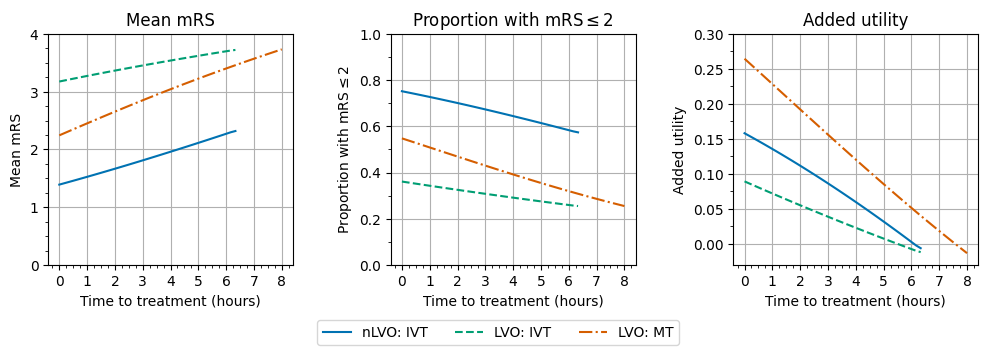

In [19]:
plot_outcomes_with_time(
    df_patients,
    outcome_labels,
    cohort_labels,
    x_times_scale,
    colours,
    linestyles,
    unit_str,
    major_step,
    minor_step,
    savename = './images/time_to_treatment.jpg'
)

Save a copy of the data behind the figure:

In [20]:
df_patients.to_csv(os.path.join(dir_output, 'mean_outcomes_with_time.csv'), index=False)

## Create a grid of treatment times

Use these treatment times:

In [21]:
t_step = 10
time_to_ivt = np.arange(0, max_time_to_ivt + 1, t_step)
time_to_mt = np.arange(0, max_time_to_mt + 1, t_step)

Mesh the two sets of times to get a grid of every combination of times in the two lists:

In [22]:
times_to_ivt_grid, times_to_mt_grid = np.meshgrid(time_to_ivt, time_to_mt)

Flatten the grids back into a column of data and store in this DataFrame:

In [23]:
df_patients_grid = pd.DataFrame()
df_patients_grid['onset_to_needle_mins'] = times_to_ivt_grid.flatten()
df_patients_grid['onset_to_puncture_mins'] = times_to_mt_grid.flatten()

### Set up separate grids for each cohort

Each cohort uses the same grid of treatment times with different stroke and treatment types:

In [24]:
dict_df_patients = create_outcome_model_inputs(df_patients_grid)

In [25]:
for key, df in dict_df_patients.items():
    print(key)
    display(df.head(2))

nlvo_ivt


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool
0,0.0,0.0,1,1,0
1,10.0,0.0,1,1,0


lvo_ivt_only


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool
0,0.0,0.0,2,1,0
1,10.0,0.0,2,1,0


lvo_ivt_mt


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool
0,0.0,0.0,2,1,1
1,10.0,0.0,2,1,1


lvo_mt_only


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool
0,0.0,0.0,2,0,1
1,10.0,0.0,2,0,1


### Calculate outcomes for each cohort

In [26]:
for key, df in dict_df_patients.items():
    dict_df_patients[key] = run_outcome_model(df)

In [27]:
for key, df in dict_df_patients.items():
    print(key)
    display(df.head(2))

nlvo_ivt


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift
0,0.0,0.0,1,1,0,0.158130,1.391000,0.752000,-0.889000
1,10.0,0.0,1,1,0,0.154488,1.413068,0.747977,-0.866932


lvo_ivt_only


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift
0,0.0,0.0,2,1,0,0.089380,3.176000,0.361000,-0.464000
1,10.0,0.0,2,1,0,0.086467,3.192402,0.357948,-0.447598


lvo_ivt_mt


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift
0,0.0,0.0,2,1,1,0.2646,2.244,0.548,-1.396
1,10.0,0.0,2,1,1,0.2646,2.244,0.548,-1.396


lvo_mt_only


,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift
0,0.0,0.0,2,0,1,0.2646,2.244,0.548,-1.396
1,10.0,0.0,2,0,1,0.2646,2.244,0.548,-1.396


### Plot outcomes for each cohort

Take the columns of data, reshape them into grids, and display the grids with a colour scale.

Setup for plots:

In [28]:
# Instead of the axes showing the row, column numbers of the grid,
# use this extent to scale the row, column numbers to the times.
# Extra division by 60 for conversion to hours.
grid_extent = np.array([
    min(time_to_ivt) - t_step * 0.5, max(time_to_ivt) + t_step * 0.5,  # x-limits
    min(time_to_mt) - t_step * 0.5, max(time_to_mt) + t_step * 0.5     # y-limits
]) / 60.0

# How many rows and columns of data are there?
grid_shape = (len(time_to_mt), len(time_to_ivt))

# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'added_utility': 'Added utility',
    'mrs_shift': 'Mean change in mRS',
}
cohort_labels = {
    'nlvo_ivt': 'nLVO treated with IVT',
    'lvo_ivt_only': 'LVO treated with IVT',
    'lvo_mt_only': 'LVO treated with MT',
    'lvo_ivt_mt': 'LVO treated with IVT and MT',
}

# Data sources:
dfs = {
    'nlvo_ivt': dict_df_patients['nlvo_ivt'],
    'lvo_ivt_only': dict_df_patients['lvo_ivt_only'],
    'lvo_mt_only': dict_df_patients['lvo_mt_only'],
    'lvo_ivt_mt': dict_df_patients['lvo_ivt_mt'],
}

# Colour setup.
cmaps = ['plasma', 'viridis_r']
# Pick out shared colour scale limits:
vlims = {
    'added_utility': [
        min([df['added_utility'].min() for df in dfs.values()]),
        max([df['added_utility'].max() for df in dfs.values()]),
    ],
    'mrs_shift': [
        min([df['mrs_shift'].min() for df in dfs.values()]),
        max([df['mrs_shift'].max() for df in dfs.values()]),
    ],
}
# Shared contour levels:
levels = {
    'added_utility': np.arange(0.00, 0.25 + 0.01, 0.05),
    'mrs_shift': np.arange(-1.2, 0.0 + 0.01, 0.2),
}

Plotting:

In [29]:
from plot_matrix import plot_matrices

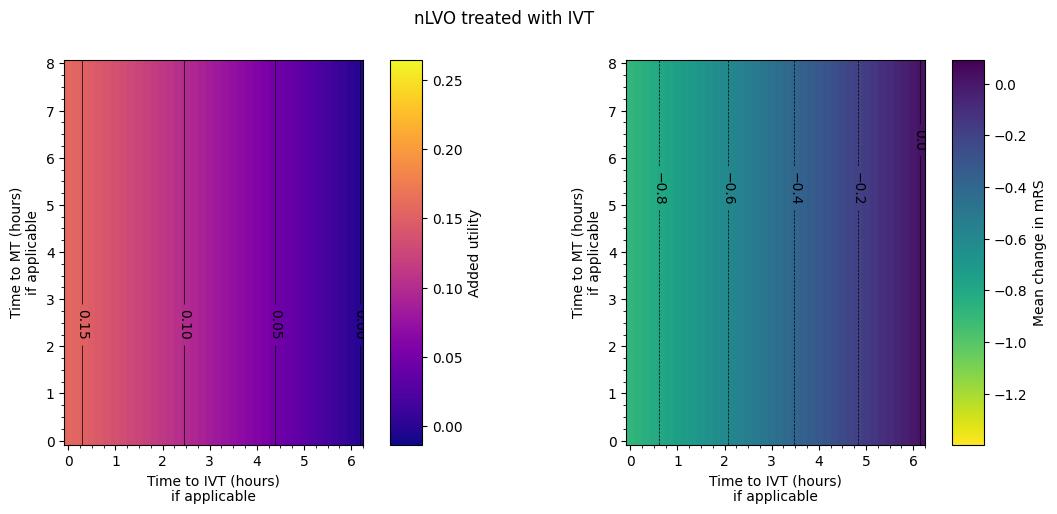

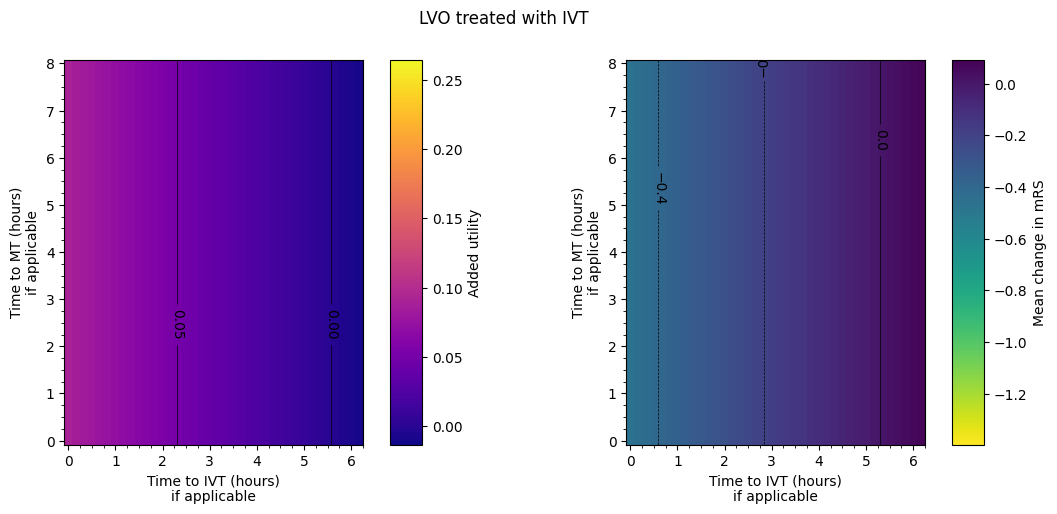

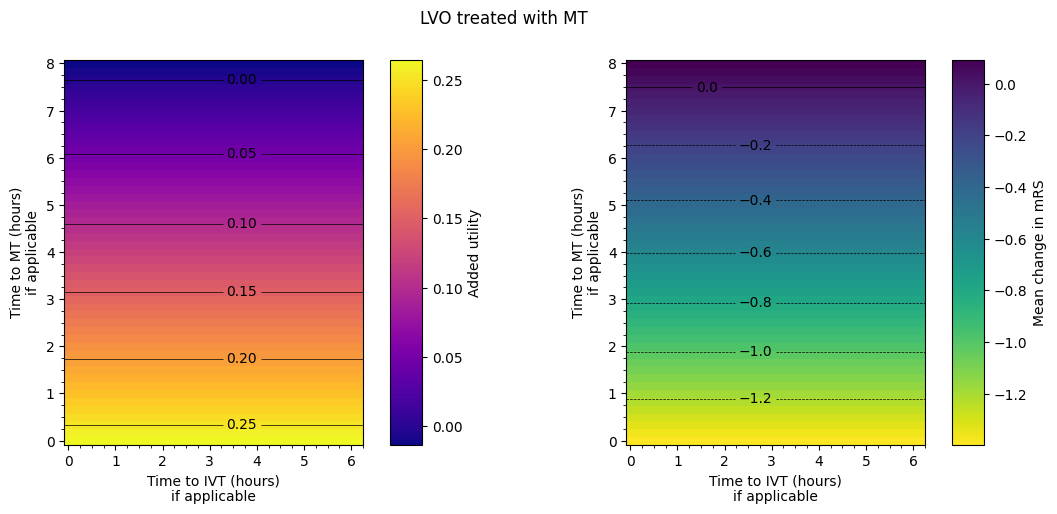

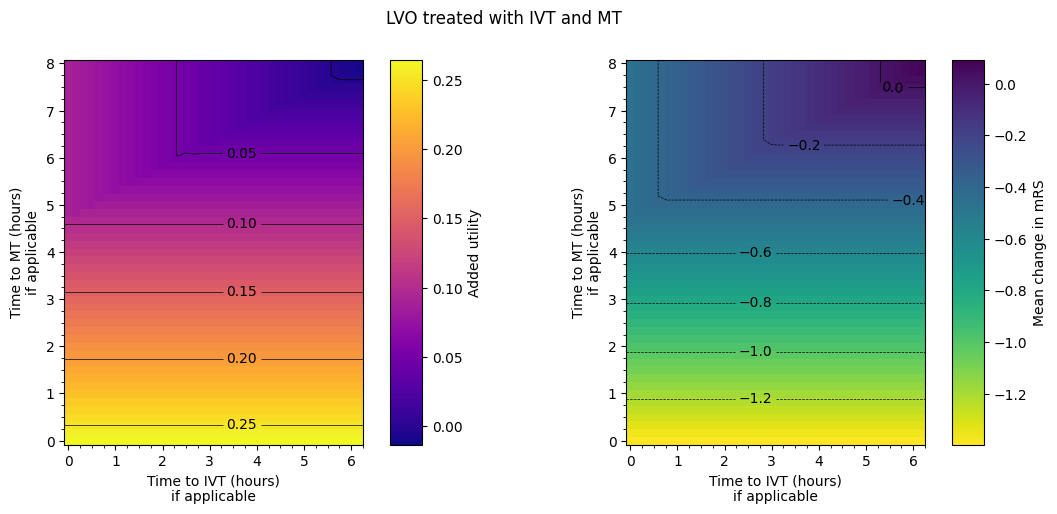

In [30]:
for cohort_name, cohort_label in cohort_labels.items():
    plot_matrices(
        dfs[cohort_name],
        outcome_labels,
        grid_shape,
        grid_extent,
        vlims,
        major_step,
        minor_step,
        levels,
        title=cohort_label,
        cmaps=cmaps,
        savename=os.path.join(dir_images, f'matrix_utility_and_mRS_{cohort_name}.jpg')
    )

The spacing between contours in terms of time isn't necessarily exactly equal for each pair of adjacent contours. From eyeballing these charts, we find:

+ nLVO with IVT:
  + around extra two hours to treatment --> drop in added utility of 0.05.
  + around extra hour and a half to treatment --> worsening of mean mRS of 0.2.
+ LVO with IVT only:
  + around extra three hours to treatment --> drop in added utility of 0.05.
  + around extra two and a quarter hours to treatment --> worsening of mean mRS of 0.2.
+ LVO with MT only:
  + around extra hour and a half to treatment --> drop in added utility of 0.05.
  + around extra hours to treatment --> worsening of mean mRS of 0.2.
+ LVO with IVT only:
  + uses the results from MT only in a certain regime and the results from IVT only outside it. The regime is when MT has been given approximately four and three quarters of an hour plus half the time to IVT. MT = 4.75 + 0.5*IVT.

The following notebook __TO DO LINK ME__ makes more thorough estimates of the changing outcomes with time.

## Combining patient groups

Here we examined the combined effect of IVT and MT on outcomes across nLVO and LVO ischaemic strokes.


In [31]:
patient_proportions = pd.read_csv(
    os.path.join('..', 'england_wales', 'output', 'patient_proportions.csv'),
    index_col=0, header=None).squeeze()

In [32]:
patient_proportions

0
haemorrhagic         0.13600
lvo_no_treatment     0.14648
lvo_ivt_only         0.00840
lvo_ivt_mt           0.08500
lvo_mt_only          0.01500
nlvo_no_treatment    0.50252
nlvo_ivt             0.10660
Name: 1, dtype: float64

### Calculate outcomes for the combined cohorts:

In [33]:
df_lvo = combine_outcomes_lvo(
    dict_df_patients['lvo_ivt_only'],
    dict_df_patients['lvo_ivt_mt'],
    dict_df_patients['lvo_mt_only'],
    patient_proportions,
    outcome_cols=[]
)

In [34]:
df_mixed = combine_outcomes_treated_ischaemic(
    dict_df_patients['nlvo_ivt'],
    dict_df_patients['lvo_ivt_only'],
    dict_df_patients['lvo_ivt_mt'],
    dict_df_patients['lvo_mt_only'],
    patient_proportions,
    outcome_cols=[]
)

In [45]:
dfs['lvo'] = df_lvo
dfs['treated_ischaemic'] = df_mixed

### Plot LVO mix

Plot the LVO mix with the same colour settings as the previous figures:

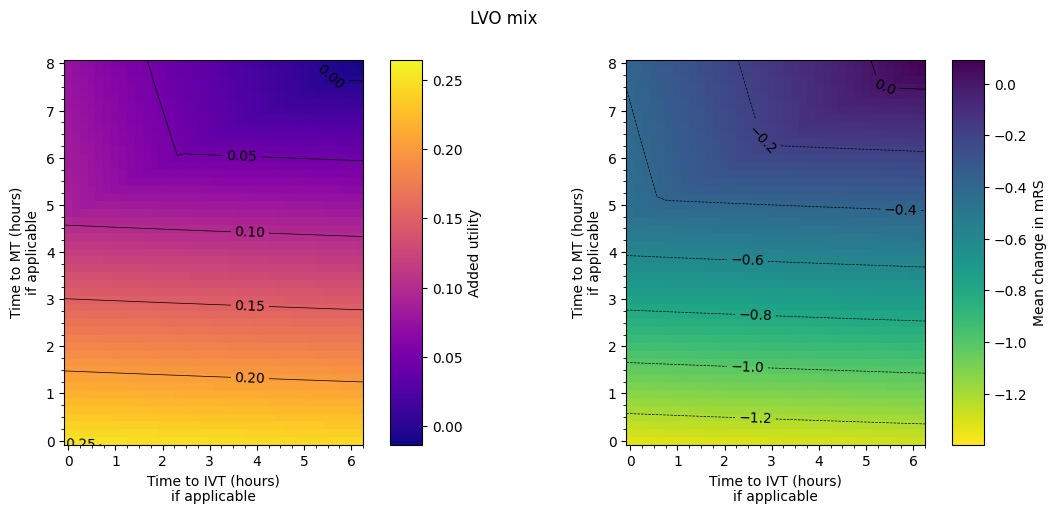

In [35]:
plot_matrices(
    df_lvo,
    outcome_labels,
    grid_shape,
    grid_extent,
    vlims,
    major_step,
    minor_step,
    levels,
    title='LVO mix',
    cmaps=cmaps,
    savename=os.path.join(dir_images, 'matrix_utility_and_mRS_lvo.jpg')
)

### Plot the mixed cohort

Setup for plots:

In [36]:
# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'added_utility': 'Mean population added utility',
    'mrs_shift': 'Mean population change in mRS',
}

# Colour setup:
cmaps = ['plasma', 'viridis_r']
# Contour levels:
levels = {
    'added_utility': np.arange(0.0, 0.2 + 0.01, 0.025),
    'mrs_shift': np.arange(-1.0, 0.0 + 0.01, 0.2),
}

# Use default colour limits:
vlims = {
    'added_utility': [None, None],
    'mrs_shift': [None, None],
}

Make the plot:

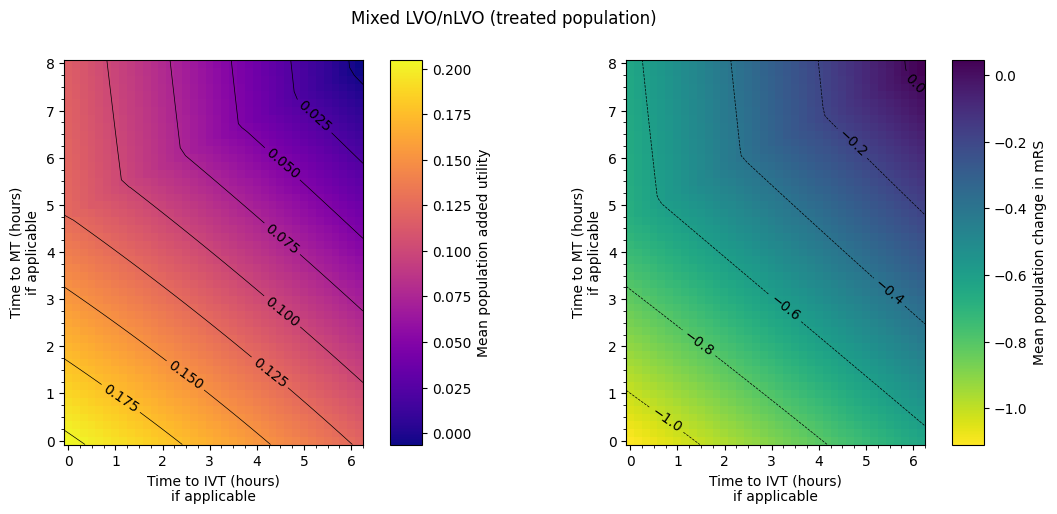

In [37]:
plot_matrices(
    df_mixed,
    outcome_labels,
    grid_shape,
    grid_extent,
    vlims,
    major_step,
    minor_step,
    levels,
    title='Mixed LVO/nLVO (treated population)',
    cmaps=cmaps,
    savename=os.path.join(dir_images, 'matrix_utility_and_mRS_mixed.jpg')
)

Data ranges:

In [38]:
cols = ['added_utility', 'mrs_shift']

df_ranges = pd.DataFrame(
    np.array([[df_mixed[c].min(), df_mixed[c].max()] for c in cols]).T,
    columns=cols,
    index=['Minimum', 'Maximum']
)

df_ranges

,added_utility,mrs_shift
Minimum,-0.006181,-1.108209
Maximum,0.204965,0.046879


Save a copy of the data these matrices:

In [46]:
for key, df in dfs.items():
    df.to_csv(os.path.join(dir_output, f'outcome_matrix_{key}.csv'), index=False)

In [47]:
dfs.keys()

dict_keys(['nlvo_ivt', 'lvo_ivt_only', 'lvo_mt_only', 'lvo_ivt_mt', 'lvo', 'mixed', 'treated_ischaemic'])